# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Proyecto: Cancelación y Segmentación de clientes en Model Fitness

En el contexto de una cadena de gimnasios Model Fitness, el objetivo de este proyecto es predecir la probabilidad de cancelación de los clientes, además, de diseñar estrategias de retención con base en la caracteristicas comunes de los clientes. 

## Importación de librerías y carga de dataset 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
df= pd.read_csv ('/datasets/gym_churn_us.csv')

1. Se importaron librerias
2. Se cargo el dataset en la variable df

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La importación de librerías es completa y adecuada para las tareas de análisis, modelado y clustering. Además, la carga del dataset en la variable `df` está bien realizada, lo que permite iniciar el análisis sin inconvenientes. </div>


## Exploración de datos 

In [3]:
df.info()
print(df.describe())
print (df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

1. Se exploraron los datos con info(), describe() y head()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La exploración inicial de los datos está bien realizada usando `info()`, `describe()` y `head()`. Esto brinda una visión clara de la estructura, tipos de variables y distribución básica, estableciendo una buena base para el análisis posterior. </div>


## Tratamiento de los datos 

In [4]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


1. Se utilizó duplicated y isnull para identificar datos duplicaos y datos nulos.
2. No se identificaron datos ausentes

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La verificación de duplicados y valores nulos fue aplicada correctamente, confirmando que el dataset está limpio y listo para el análisis sin necesidad de imputaciones adicionales. </div>


## Clientes que cancelaron vs clientes que se quedaron 

### Valores medios de los grupos 

In [5]:

print("Medias por grupo:")
print(df.groupby("Churn").mean(numeric_only=True))


Medias por grupo:
         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                

1. Se agrupó el dataframe según la columna "Churn" mediante groupby.
2. Se calculó la media de cada columna númerica dentro del grupo con mean. 


Conclusión: 
Se observa una diferencia en las medias de las variables Near_Location, Partner, Promo_friends, Age, Lifetime, Avg_class_frequency_total y Avg_class_frequency_current_month, lo que sugiere que estas características podrían considerarse factores relevantes para la retención de clientes.


### Histogramas 

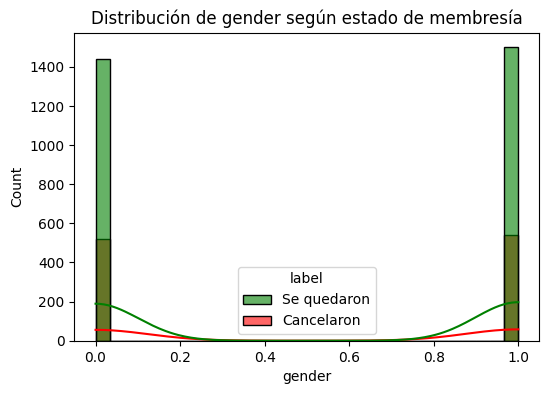

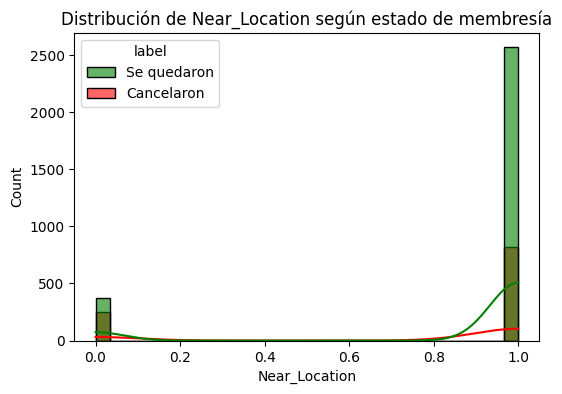

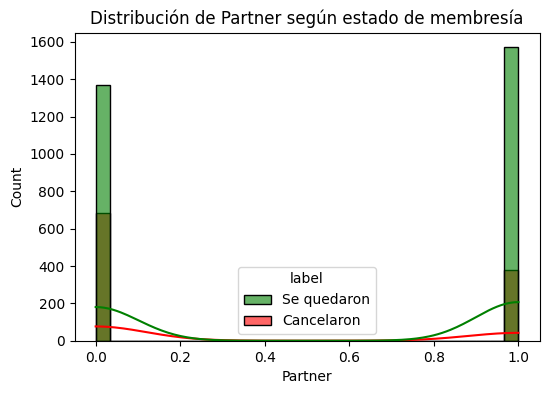

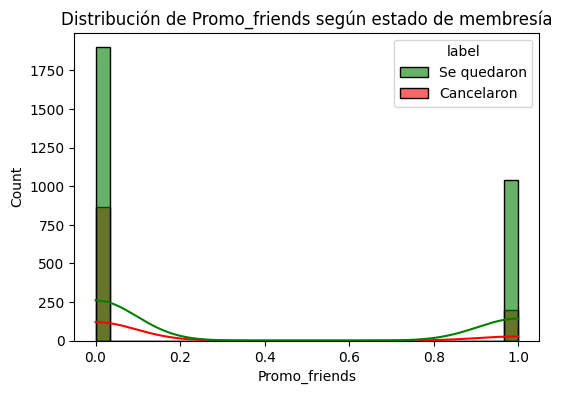

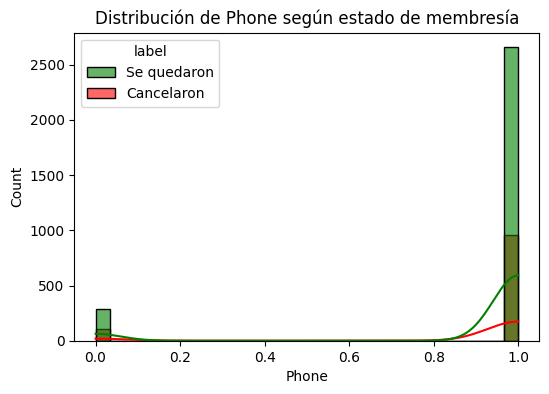

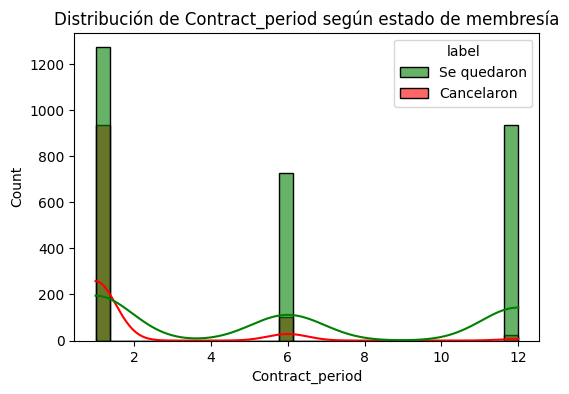

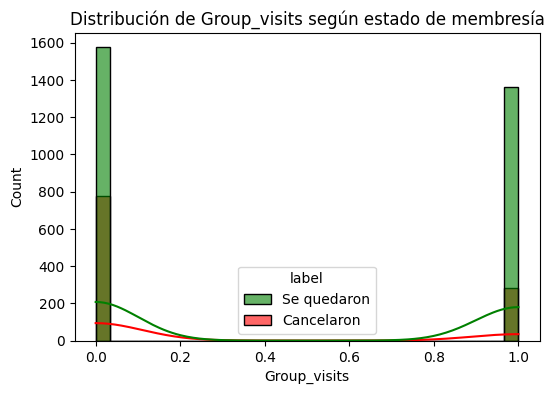

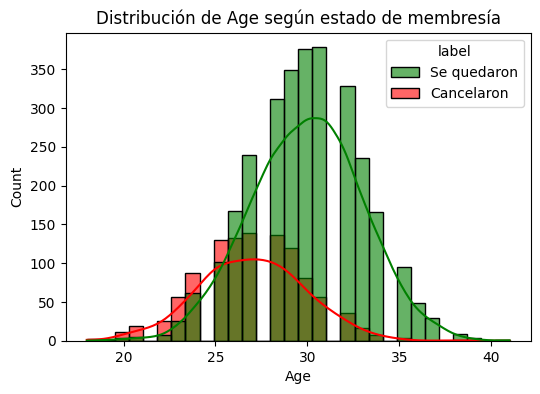

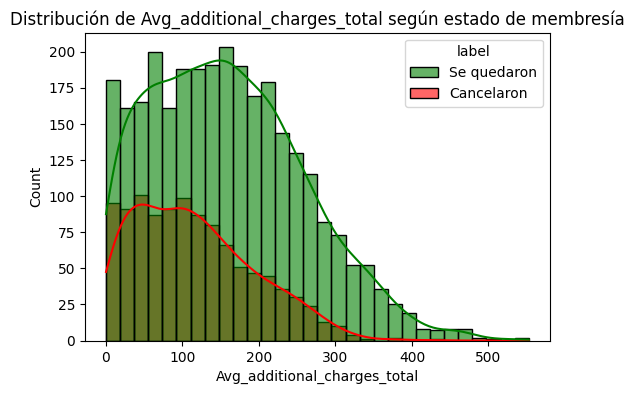

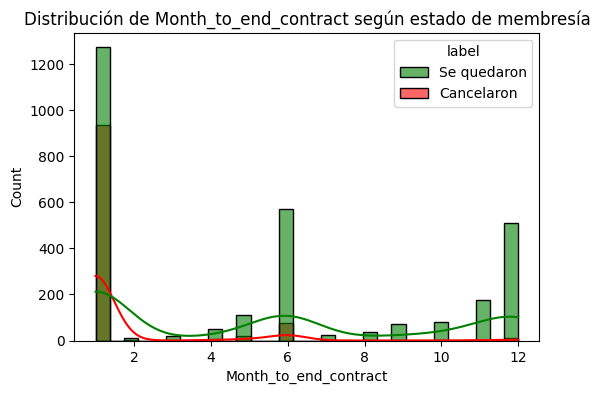

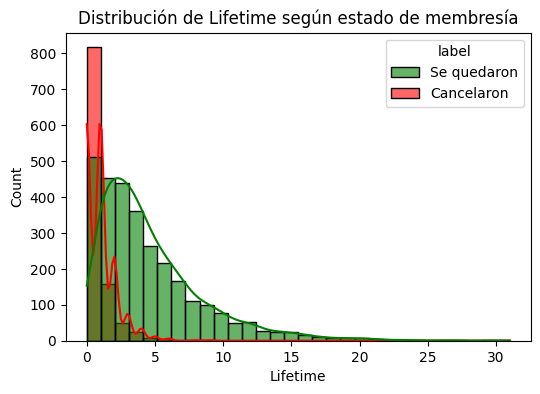

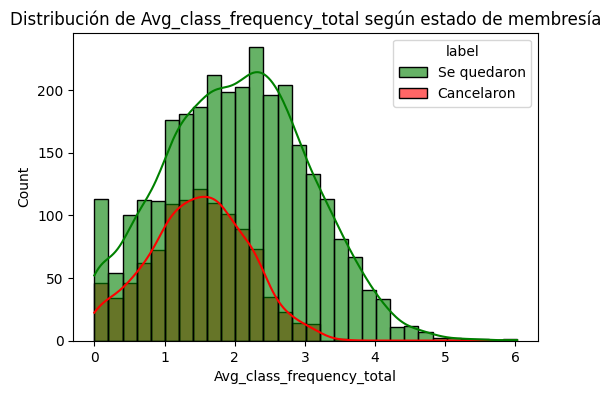

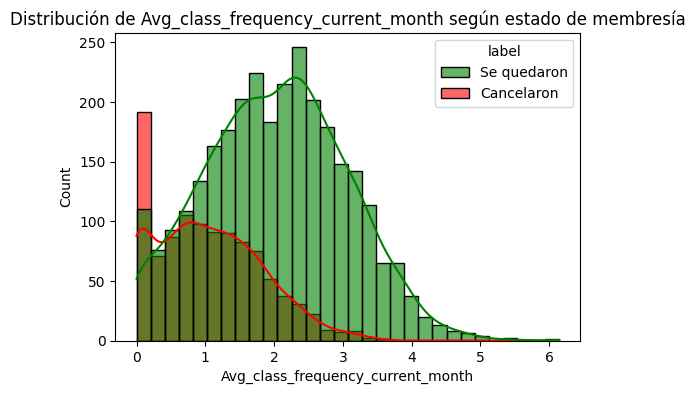

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


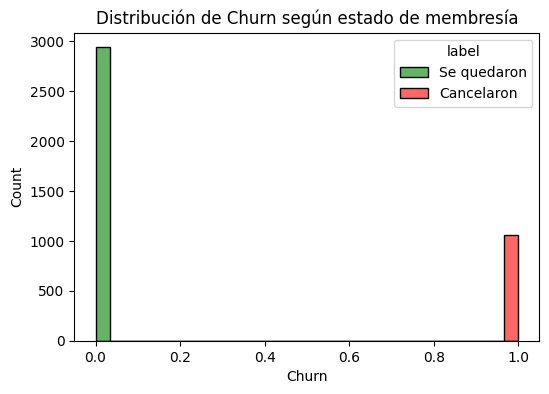

In [6]:

df["label"] = df["Churn"].map({0: "Se quedaron", 1: "Cancelaron"})

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue="label", kde=True, bins=30, palette={"Se quedaron": "green", "Cancelaron": "red"}, alpha=0.6)
    plt.title(f"Distribución de {col} según estado de membresía")
    plt.show()  
 

1. Las etiquetas se cambiaron para ser más legibles con .map({...}).
2. Se seleccionó solo las columnas númericas en la variable numeric_cols.
3. Se realizó un bucle para correr cada columna.
4. Se graficó 


Conclusión:  
Los gráficos muestran que el género influye en la cancelación de clientes, aunque la diferencia entre quienes se quedaron y quienes cancelaron no es mucha. En cambio, variables como la antigüedad en el gimnasio, tipo y la duración del contrato, la frecuencia de visitas y el consumo de servicios adicionales presentan contrastes mucho más marcados.


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - Muy buen análisis comparativo entre clientes que se quedaron y los que cancelaron. El uso de `groupby` para calcular medias y los histogramas para visualizar distribuciones aportan claridad, mostrando con acierto qué variables marcan mayores diferencias en la retención. </div>


### Matriz de correlación 

In [7]:
numeric_df = df.select_dtypes(include=['int64','float64'])

corr = numeric_df.corr()
print(corr.head())

                 gender  Near_Location   Partner  Promo_friends     Phone  \
gender         1.000000       0.006699 -0.010463      -0.005033 -0.008542   
Near_Location  0.006699       1.000000 -0.005119       0.210964 -0.015763   
Partner       -0.010463      -0.005119  1.000000       0.451960  0.009970   
Promo_friends -0.005033       0.210964  0.451960       1.000000  0.001982   
Phone         -0.008542      -0.015763  0.009970       0.001982  1.000000   

               Contract_period  Group_visits       Age  \
gender                0.000502      0.017879  0.013807   
Near_Location         0.150233      0.154728  0.058358   
Partner               0.306166      0.022710  0.047480   
Promo_friends         0.244552      0.120170  0.050113   
Phone                -0.006893     -0.010099 -0.011403   

               Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
gender                            -0.009334              -0.001281  0.013579   
Near_Location               

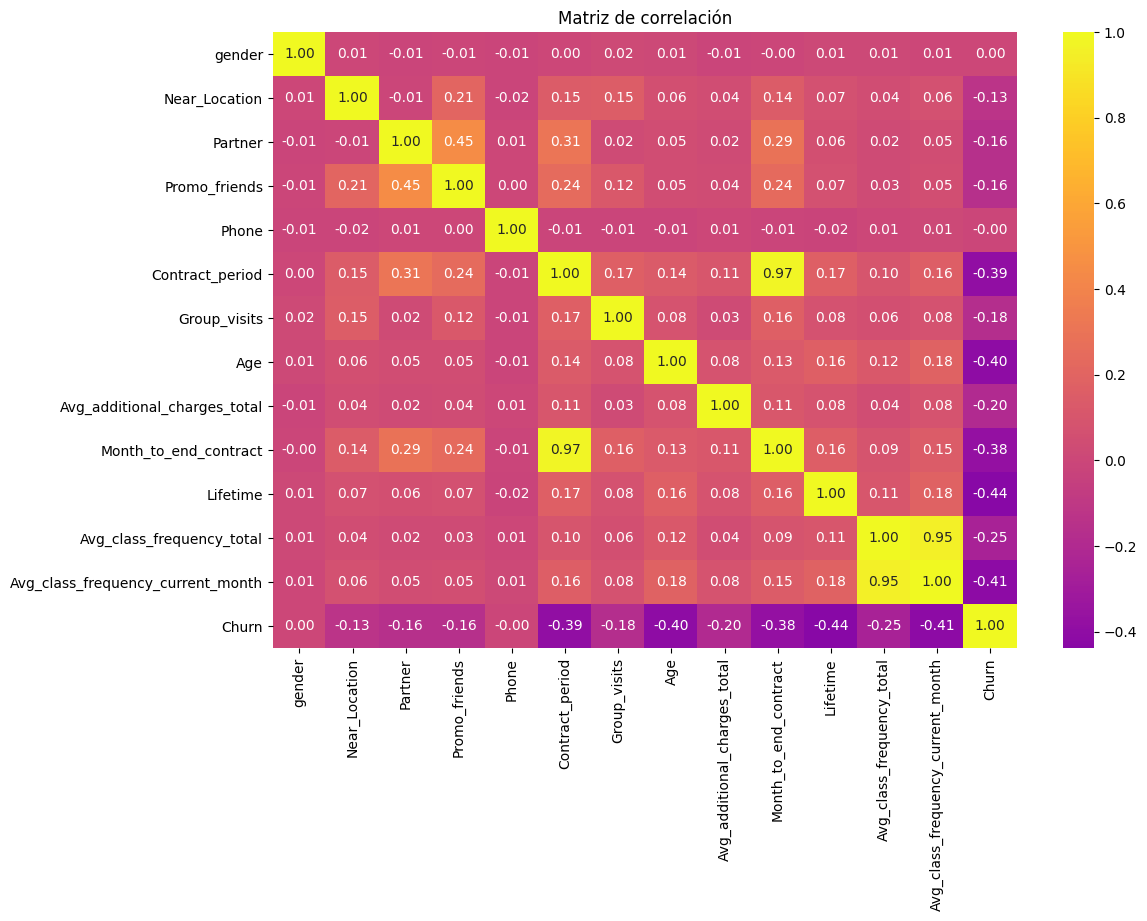

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="plasma", center=0)
plt.title("Matriz de correlación")
plt.show()

1. Se hizo una matriz de correlación con .corr().
2. Se mostró un mapa de color. 

Conclusión: Se observó que las siguientes caracteristicas tienen una relación negativa con la variable Churn: contract_period -0.39, Age -0.38, Lifetime -0.44, Avg_class_frequency_current_month -0.41. Lo anterior, indica que cuando esa característica aumenta, la probabilidad de Churn disminuye. 


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El análisis de la matriz de correlación está bien planteado, destacando de manera clara las variables con mayor relación inversa con la cancelación. La visualización mediante heatmap complementa de forma efectiva la interpretación de los resultados. </div>


## Construcción de modelo 

### Preparación de datos 

In [9]:
safe_cols = [
    'gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
    'Age', 'Lifetime', 'Group_visits',
    'Avg_class_frequency_total', 'Avg_additional_charges_total'
]
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded[safe_cols]
y = df_encoded['Churn']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



1. En la variable safe_cols se pudieron las variables sin fuga de información. 
2. Se convirtieron las columnas en categoricas con .get_dummies dento del dataset codificado.
3. Se dividieron los datos en partes.


### Entrenamiento de modelo

In [10]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

def evaluar(nombre, modelo):
    y_pred = modelo.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    print(f"\nModelo: {nombre}")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precisión: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")

evaluar("Regresión Logística", log_reg)
evaluar("Bosque Aleatorio", rf)



Modelo: Regresión Logística
Accuracy : 0.880
Precisión: 0.796
Recall   : 0.736

Modelo: Bosque Aleatorio
Accuracy : 0.884
Precisión: 0.802
Recall   : 0.745


1. Se establecieron los modelos.
2. Se establecieron datos de entrenamiento.
3. Se define una función evaluar. 
4. Se calculan las tres medias: Accuracy, Precisión, Recall.
5. Se ejecuta la función. 

Conclusión: En general, ambos modelos mostraron resultados parecidos, con una ligera superioridad del Bosque aleatorio. 

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - La preparación de datos y el entrenamiento de los modelos están bien estructurados, con selección adecuada de variables y métricas relevantes. La comparación clara entre regresión logística y bosque aleatorio aporta solidez al análisis y refuerza la validez de los resultados obtenidos. </div>


## Clústeres de usuarios/as

### Dendograma 

In [11]:
y = df['Churn']
X = df.drop(columns=['Churn'])

X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

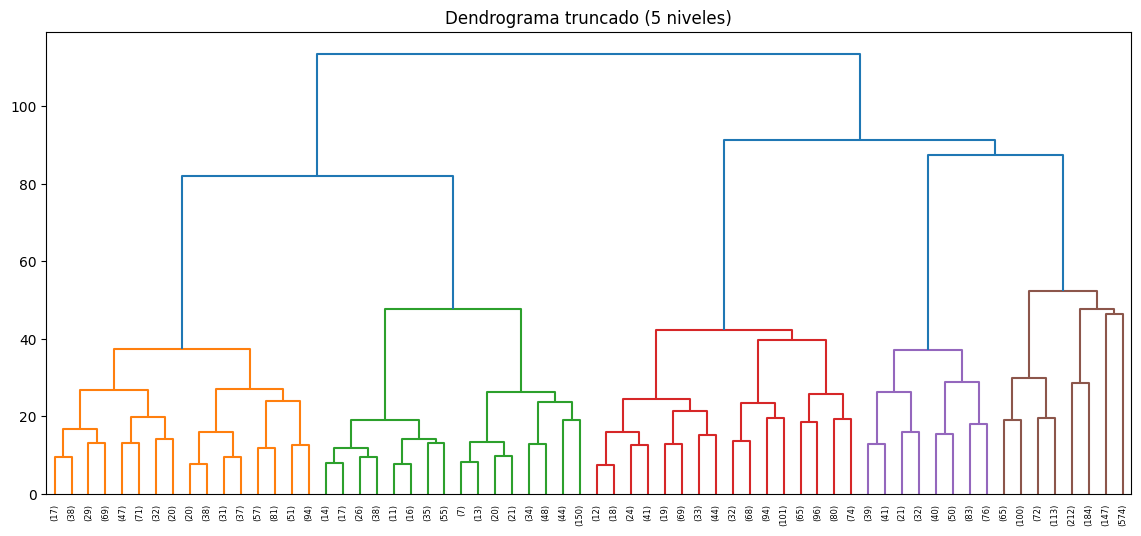

In [12]:

linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(14, 6))
dendrogram(linked, truncate_mode='level', p=5)  # p = niveles que se muestran
plt.title("Dendrograma truncado (5 niveles)")
plt.show()



1. Se dividió el datasets.
2. Se convirtieron las variables categoricas en númericas.
3. Se pusieron todas las variables en la misma escala.
4. Se uso linkage, para calcular la distancia entre clientes para agruparlos.
5. Se gráfico el dendograma donde muestre 5 niveles de agrupación. 

### Modelo de Clustering 

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [14]:
df['cluster'] = clusters
print("Promedio de características por cluster:")
print(df.groupby('cluster').mean())

Promedio de características por cluster:
           gender  Near_Location   Partner  Promo_friends     Phone  \
cluster                                                               
0        0.475638       0.827146  0.447796       0.254060  1.000000   
1        0.503106       0.938923  0.768116       0.564182  1.000000   
2        0.550059       0.840989  0.374558       0.215548  0.998822   
3        0.524804       0.866841  0.469974       0.308094  0.000000   
4        0.507447       0.760638  0.341489       0.179787  0.997872   

         Contract_period  Group_visits        Age  \
cluster                                             
0               2.647332      0.381671  30.010441   
1              11.173913      0.557971  29.899586   
2               2.750294      0.441696  29.984688   
3               4.806789      0.428198  29.331593   
4               1.567021      0.257447  26.908511   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster        

1. Se forman 5 clusters.
2. Se guardan los clusters en un dataframe.
3. Se promedia cada variable numérica.

### Distribuciones 

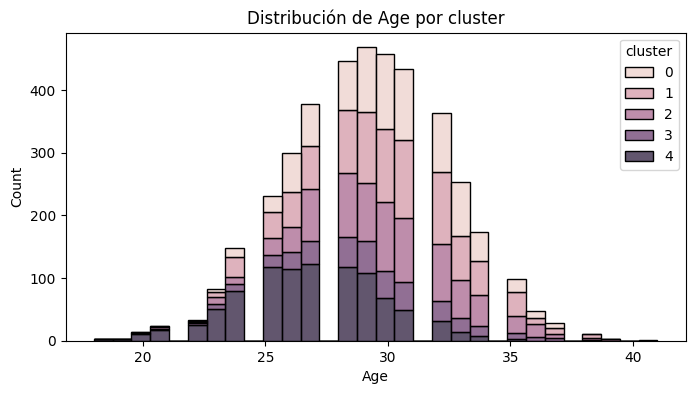

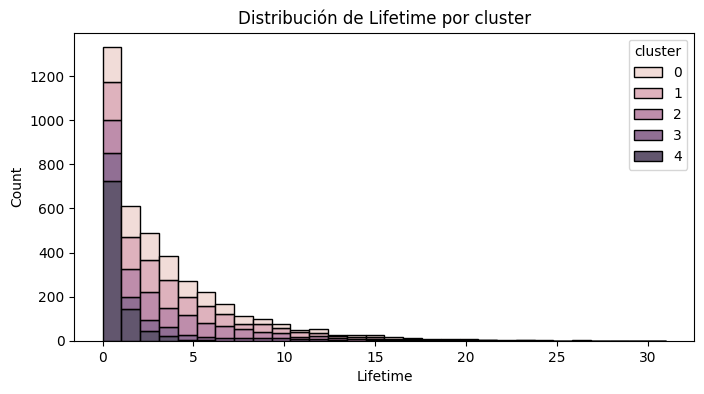

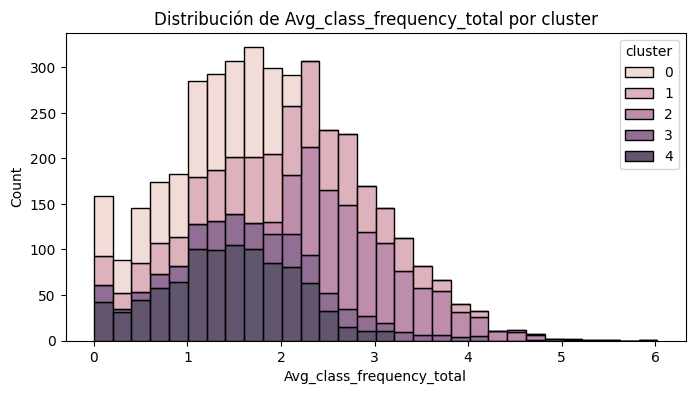

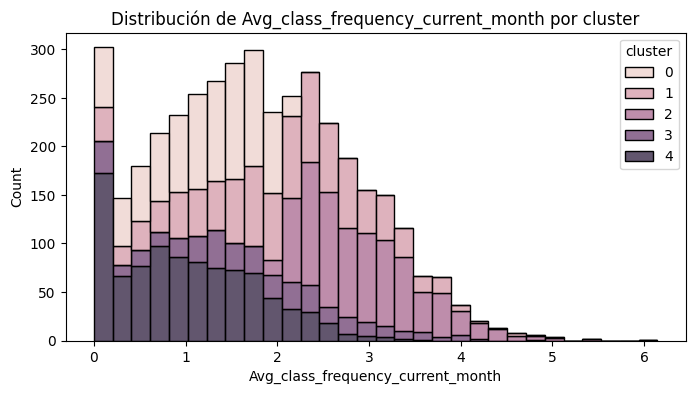

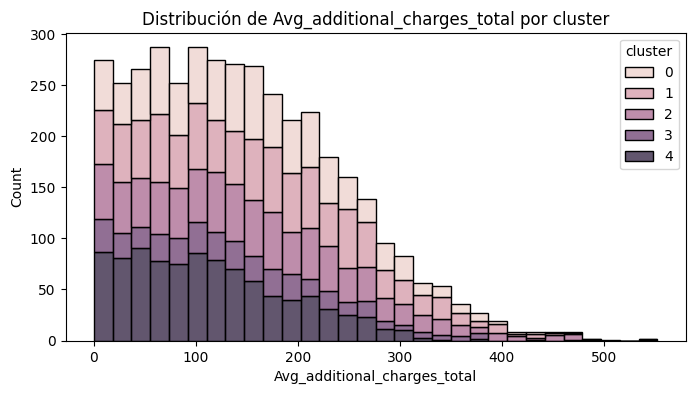

In [15]:
for col in ['Age', 'Lifetime', 'Avg_class_frequency_total',
            'Avg_class_frequency_current_month', 'Avg_additional_charges_total']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='cluster', multiple='stack', bins=30)
    plt.title(f"Distribución de {col} por cluster")
    plt.show()


1. Se realizó histogramas comparativos de cada cluster 

Conclusión: Tanto en los promedios de las características de los clústeres como en los histogramas se observan diferencias claras entre ellos. Algunos grupos concentran a clientes de nuevo ingreso con baja actividad, mientras que en otros predominan clientes con mayor antigüedad y uso frecuente, quienes presentan una mayor retención.

### Tasa de cancelación 

In [16]:
churn_rate = df.groupby('cluster')['Churn'].mean().sort_values()
print("\nTasa de cancelación por cluster:")
print(churn_rate)


Tasa de cancelación por cluster:
cluster
0    0.001160
2    0.007067
1    0.015528
3    0.263708
4    0.997872
Name: Churn, dtype: float64


1. Se agruparon los datos por el número de cluster. 
2. Se promedio dentro de cada cluster el promedio de Churn.
3. Se ordena de mayor a menor y se muestra. 


Conclusiones: se observa que los clusters 3, 2 y 1 son los clusters con la mayoría de quienes que se quedan. Por otro lado, los clusters 4 y 0 contienen a la mayoría de los clientes que cancelan.  

## Conclusiones y Recomendaciones 

### Hallazgos 

En este proyecto se analizaron los datos de clientes de un gimnasio con el objetivo de comprender los factores que influyen en la cancelación de membresias. Se construyeron modelos predictivos de clasificación, regresión logística y bosque aleatorio, para estimar la probabilidad de abandono y se evaluó su desempeño. Además, se aplicaron técnicas de segmentación mediante clustering, como jerárquico y K-means, para identificar perfiles de clientes con distintos niveles de riesgo de cancelación y de lealtad. 

A lo largo del análisis se evidenció que variables como la antigüedad en el gimnasio, la duración del contrato, la edad, la frecuencia de visitas y los gastos adicionales son factores clave en la retención de clientes, pues muestran una relación negativa con la cancelación: a mayor valor de estas características, menor probabilidad de abandono. 

Asimismo, los clústeres refuerzan esta lectura: los grupos 1, 2 y 3 agrupan principalmente a clientes leales, con contratos más largos, mayor uso y estabilidad; mientras que los clústeres 0 y 4 concentran a los clientes de mayor riesgo, caracterizados por contratos cortos, baja frecuencia y alta tasa de cancelación. Estos hallazgos permiten identificar con claridad los segmentos críticos ofreciendo una base sólida para diseñar estrategias de retención. 


### Estrategias básicas



Según lo observado, en los clústers 1, 2 y 3 donde hay más usuarios con mayor permanencia, son clave los contratos largos y una alta frecuencia de ida al gym. Esto último junto con el contrato adicional de otros servicios. Por lo cual, las recomendaciones va en estos tres puntos: 

1. Fortalecer la fidelidad de los clientes: se podría implementar un programa de recompensas o descuentos exclusivos a membresias semestrales o anuales.
   
2. Incentivar la asistencia al gimnasio: se podrían implementar retos fitness o la organización eventos especiales o establecer bonos de asistencia semanal o quincenal.
 
3. Promover el consumo de otros servicios: se podría integrar el sistema de recompensas o bonos de asistencia.También se podría ofrecer paquetes integrados de entrenamiento y servicios extras.




<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br> <b>Éxito</b> - El cierre del proyecto integra muy bien los hallazgos del modelado y del clustering, conectándolos con recomendaciones prácticas. La interpretación de los factores de retención y la segmentación por clústeres está clara y bien fundamentada, mostrando un buen equilibrio entre el análisis técnico y las estrategias propuestas. </div>


## Comentario general del revisor 

# Comentario General del Revisor

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>  

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio, y construcción de modelos predictivos. A continuación, destaco los puntos positivos:

#### Puntos Positivos:

* **Procesamiento de datos:** Verificaste duplicados y valores nulos de forma correcta, asegurando la calidad del dataset.
* **Visualización y análisis gráfico:** Presentaste histogramas, distribuciones y un heatmap que enriquecieron la interpretación de los patrones de clientes.
* **Ingeniería de características:** Seleccionaste variables adecuadas y trabajaste con datos estandarizados para evitar fuga de información en los modelos.
* **Comparación de modelos:** Implementaste regresión logística y bosque aleatorio, evaluando métricas de desempeño y resaltando al modelo más eficaz.
* **Segmentación de clientes:** Aplicaste clustering jerárquico y KMeans, identificando perfiles con distintos niveles de retención y riesgo.
* **Recomendaciones estratégicas:** Las conclusiones están bien conectadas con acciones de negocio concretas para mejorar la retención.

Tu análisis es completo, cumple con todos los requisitos del brief y ofrece valor práctico a la empresa. Has integrado teoría y práctica con claridad, mostrando gran avance en tus habilidades de ciencia de datos. </div>
